## This notebook uses the rolled datasets created for each device_id to extract features, combine them into one dataset and finally fit a model

The final label requirement we decided on was that 5 hour intervals where the sensor has more than 10 non-ideal readings will be labelled warm or cold. If the sensor has one reading that is dangerous (<0 or >25) then it will be labelled freezing or hot. Otherwise, the interval will be considered ideal

In [2]:
import pandas as pd
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation
import numpy as np
from tsfresh.utilities.dataframe_functions import roll_time_series
import tsfresh

settings =  tsfresh.feature_extraction.ComprehensiveFCParameters()

df = preprocessing.load_relevant_data()
devices = df["device_id"].value_counts()
df_rolled = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_59497.h5', key='df')
y_shifted = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_labels_shifted_device_59497.h5', key='y')
features = tsfresh.feature_extraction.extract_features(df_rolled, 
                                                column_id = "id",
                                                column_sort = "datetime",
                                                default_fc_parameters=settings,
                                                column_value = "temperature")
y_shifted = y_shifted.dropna()
features = features.loc[y_shifted.index]

Feature Extraction: 100%|██████████| 30/30 [02:12<00:00,  4.42s/it]


## This is the code used to extract features and combine the datasets

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
i = 1
for device in devices.index:
    if device == 59497:
        print("passing 59497")
        continue
    
    print("working on device " +str(i))
    temp_df_rolled = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_' + str(device) + '.h5', key='df')
    temp_y_shifted = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_labels_shifted_device_' + str(device) + '.h5', key='y')
    temp_features = tsfresh.feature_extraction.extract_features(temp_df_rolled, 
                                                column_id = "id",
                                                column_sort = "datetime",
                                                default_fc_parameters=settings,
                                                column_value = "temperature")
    temp_y_shifted = temp_y_shifted.dropna()
    temp_features = temp_features.loc[temp_y_shifted.index]
    features = features.append(temp_features)
    y_shifted = y_shifted.append(temp_y_shifted)
    i+=1

working on device 1


Feature Extraction: 100%|██████████| 30/30 [28:02<00:00, 56.08s/it]  


working on device 2


Feature Extraction: 100%|██████████| 30/30 [24:23<00:00, 48.80s/it]  


working on device 3


Feature Extraction: 100%|██████████| 30/30 [20:05<00:00, 40.18s/it]  


working on device 4


Feature Extraction: 100%|██████████| 30/30 [18:40<00:00, 37.36s/it]  


working on device 5


Feature Extraction: 100%|██████████| 30/30 [16:19<00:00, 32.65s/it]  


working on device 6


Feature Extraction: 100%|██████████| 30/30 [14:40<00:00, 29.37s/it]  


working on device 7


Feature Extraction: 100%|██████████| 30/30 [14:07<00:00, 28.26s/it]  


working on device 8


Feature Extraction: 100%|██████████| 30/30 [09:36<00:00, 19.21s/it]


working on device 9


Feature Extraction: 100%|██████████| 30/30 [05:27<00:00, 10.92s/it]


working on device 10


Feature Extraction: 100%|██████████| 30/30 [03:15<00:00,  6.52s/it]


working on device 11


Feature Extraction: 100%|██████████| 30/30 [02:47<00:00,  5.59s/it]


passing 59497
working on device 12


Feature Extraction: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


working on device 13


Feature Extraction: 100%|██████████| 30/30 [00:44<00:00,  1.48s/it]


working on device 14


Feature Extraction: 100%|██████████| 27/27 [00:06<00:00,  4.37it/s]


In [5]:
nan_columns = features.columns[features.isna().any()].tolist()
features = features.drop(columns=nan_columns)

In [6]:
features

temperature__variance_larger_than_standard_deviation  \
59497 99                                                 1.0      
      100                                                1.0      
      101                                                1.0      
      102                                                1.0      
      103                                                1.0      
...                                                      ...      
47683 151                                                1.0      
      152                                                1.0      
      153                                                1.0      
      154                                                1.0      
      155                                                1.0      

           temperature__has_duplicate_max  temperature__has_duplicate_min  \
59497 99                              0.0                             0.0   
      100                             0.0                             0.0   
      101                             0.0                             0.0   
      102                             0.0                             0.0   
      103                             0.0                             0.0   
...                                   ...                             ...   
47683 151                             1.0                             1.0   
      152                             1.0                             1.0   
      153                             1.0                             1.0   
      154                             1.0                             1.0   
      155                             1.0                             1.0   

           temperature__has_duplicate  temperature__sum_values  \
59497 99                          1.0                    548.0   
      100                         1.0                    536.5   
      101                         1.0                    529.8   
      102                         1.0                    526.4   
      103                         1.0                    524.9   
...                               ...                      ...   
47683 151                         1.0                   2682.2   
      152                         1.0                   2680.3   
      153                         1.0                   2678.5   
      154                         1.0                   2676.7   
      155                         1.0                   2674.8   

           temperature__abs_energy  temperature__mean_abs_change  \
59497 99                   3750.48                      0.270707   
      100                  3436.53                      0.224242   
      101                  3284.44                      0.191919   
      102                  3218.48                      0.173737   
      103                  3191.93                      0.167677   
...                            ...                           ...   
47683 151                 72109.48                      0.051515   
      152                 72004.41                      0.051515   
      153                 71904.69                      0.052525   
      154                 71804.97                      0.051515   
      155                 71699.52                      0.051515   

           temperature__mean_change  \
59497 99                  -0.117172   
      100                 -0.068687   
      101                 -0.034343   
      102                 -0.016162   
      103                 -0.008081   
...                             ...   
47683 151                 -0.019192   
      152                 -0.019192   
      153                 -0.018182   
      154                 -0.019192   
      155                 -0.019192   

           temperature__mean_second_derivative_central  temperature__median  \
59497 99                                  2.448980e-02                 5.45   
      100                                 1.

In [7]:
features_directory = r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_features.h5'
y_directory = r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_labels.h5'
#features.to_hdf(features_directory, key='f')

In [8]:
y_shifted.to_hdf(y_directory,key='y')

C:\Python\lib\site-packages\pandas\io\pytables.py:278: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  f(store)


In [9]:
from tsfresh import select_features
selected_features = select_features(features,y_shifted["label_shifted"])

In [10]:
selected_features_directory = r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_selected_features.h5'
selected_features.to_hdf(selected_features_directory, key='f')

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline

rf_clf = make_pipeline(
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)


In [12]:
from sklearn.model_selection import cross_val_predict

cv_predict_result = cross_val_predict(rf_clf, selected_features, y_shifted["label_shifted"].to_numpy())

In [13]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_shifted["label_shifted"].to_numpy(),cv_predict_result)

0.5957811283115145

In [14]:
cv_result = cross_validate(rf_clf, selected_features, y_shifted["label_shifted"].to_numpy(), scoring = ["accuracy", "balanced_accuracy"])
cv_result["test_accuracy"].mean()
cv_result["test_balanced_accuracy"].mean()

0.8135844376947597

0.7561894344031657

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
mlp_clf = make_pipeline(
    RandomUnderSampler(random_state=42),
    StandardScaler(),
    MLPClassifier(random_state=42, max_iter=1000),
)
#Problem with neural networks dont usually remove collinear features. Run PCA after scaling
cv_predict_mlp = cross_val_predict(mlp_clf, selected_features, y_shifted["label_shifted"].to_numpy())
matthews_corrcoef(y_shifted["label_shifted"].to_numpy(),cv_predict_mlp)

0.42392952464971756

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = make_pipeline(
    RandomUnderSampler(random_state=42),
    StandardScaler(),
    KNeighborsClassifier(),
)
#Simple as MLP/neural networks
cv_predict_kn = cross_val_predict(kn_clf, selected_features, y_shifted["label_shifted"].to_numpy())
matthews_corrcoef(y_shifted["label_shifted"].to_numpy(),cv_predict_kn)

0.33183747539374087

In [17]:
#lightgbm, SVM(scale and remove collinear features)
#from sklearn.metrics import confusion_matrix

#print(rf_clf.named_steps['randomforestclassifier'].classes_)
#confusion_matrix(y_shifted["label_shifted"].to_numpy(),cv_predict_result)

In [18]:

rf_clf.named_steps['randomforestclassifier'].__dict__.keys()

dict_keys(['base_estimator', 'n_estimators', 'estimator_params', 'bootstrap', 'oob_score', 'n_jobs', 'random_state', 'verbose', 'warm_start', 'class_weight', 'max_samples', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'ccp_alpha'])

In [19]:
rf_clf.fit(selected_features, y_shifted["label_shifted"].to_numpy())

Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=2, random_state=42))])

In [20]:
rf_clf.named_steps['randomforestclassifier'].classes_

array(['cold', 'freezing', 'hot', 'ideal', 'warm'], dtype=object)

In [22]:
#confusion_matrix(y_shifted["label_shifted"].to_numpy(),cv_predict_result)

In [23]:
importance = pd.Series(rf_clf.named_steps['randomforestclassifier'].feature_importances_,index = selected_features.columns).sort_values(ascending = False)

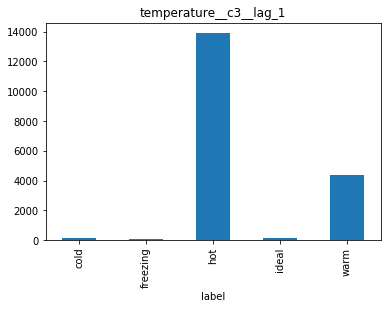

In [24]:
xy_matrix = selected_features
xy_matrix["label"] = y_shifted["label_shifted"]
xy_matrix.groupby("label")[importance.index[0]].mean().plot(kind='bar', title = importance.index[0])

In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Text(0.5, 0.98, 'Top 10 most important features in RF model')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__c3__lag_1')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__quantile__q_0.2')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__quantile__q_0.1')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__minimum')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__fft_coefficient__attr_"real"__coeff_0')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__fft_coefficient__attr_"abs"__coeff_0')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__abs_energy')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__quantile__q_0.3')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'temperature__sum_values')

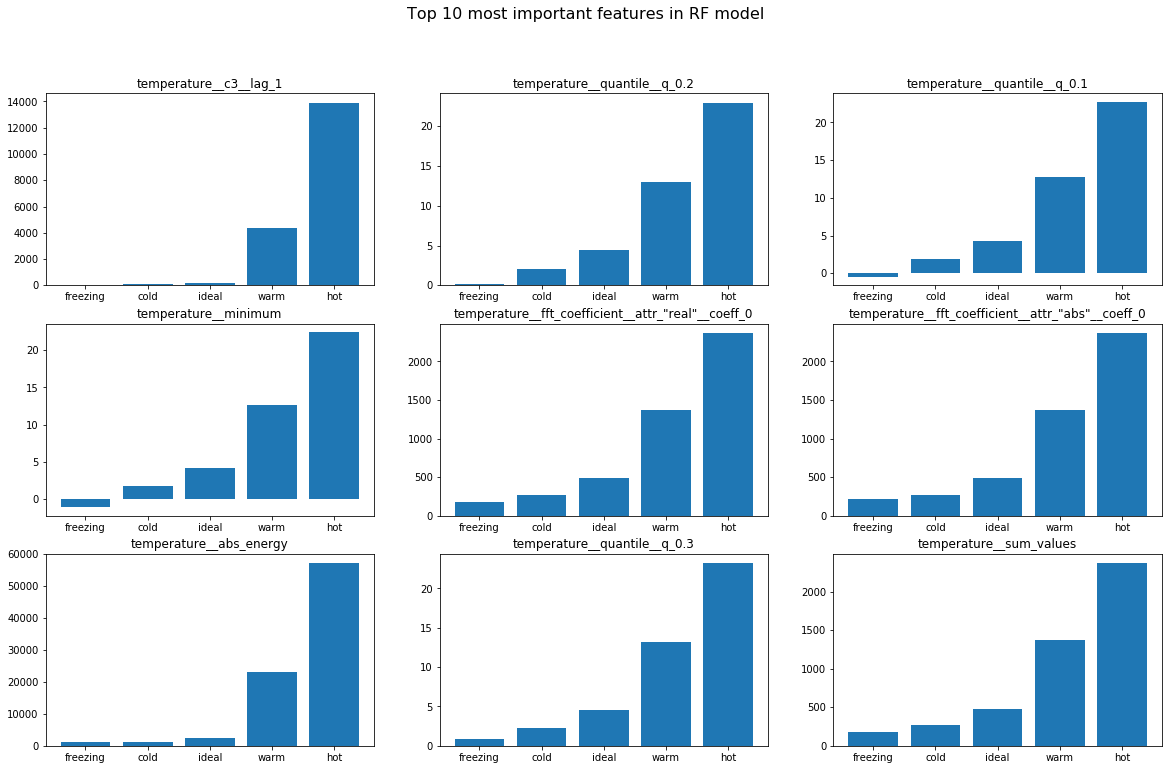

In [26]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(3,3)
fig.set_size_inches(20,12)
fig.suptitle("Top 10 most important features in RF model",fontsize=16)
imp = 0
for i in range(3):
    for j in range(3):
        axs[i,j].bar(xy_matrix.groupby("label")[importance.index[imp]].mean().sort_values().index,
                     xy_matrix.groupby("label")[importance.index[imp]].mean().sort_values().values)
        axs[i,j].set_title(importance.index[imp])
        imp +=1
#fig.tight_layout()
fig.savefig(r'C:\Users\AliHa\Desktop\Masters Project\medangel\reports\figures\importance.pdf', orientation='landscape')